In [1]:
from PIL import Image
import xml.etree.ElementTree as ET
import re as re
import imageio as imageio

In [123]:
class VARIABLE:
    def __init__(self):
        self.name = ''
        self.value = 0

def Variable2Dict(Variable):
    '''Takes a list of objects of class VARIABLE and returns the data in a dictionary
    return varDict'''
    varDict = {vari.name: vari.value for vari in Variable}
    return varDict


In [127]:
im = Image.open("magAtoms_46.png")

In [128]:
info = im.info
print(info["Settings"])

<?xml version="1.0" encoding="ISO8859-1" standalone="no" ?>
<controlconfig>

  <image>
    <name>magAtoms</name>
    <camera>Camera_Mag</camera>
    <shutteroff>0</shutteroff>
    <sequencelength>1</sequencelength>
    <acquisitionmode>0</acquisitionmode>
    <exposuretime>0.001</exposuretime>
    <isregionofinterest>0</isregionofinterest>
    <offsetx>0</offsetx>
    <offsety>0</offsety>
    <sizex>640</sizex>
    <sizey>480</sizey>
    <detuning>0</detuning>
    <sigma0>2.807E-13</sigma0>
    <custom>0</custom>
    <numofcomponents>1</numofcomponents>
    <toftime>0.0</toftime>
    <trapfreqx></trapfreqx>
    <trapfreqy></trapfreqy>
    <trapfreqz></trapfreqz>
    <mass>1.4446686951E-25</mass>
    <historyscale>1</historyscale>
    <historyoffset>0</historyoffset>
    <fits/>
  </image>

</controlconfig>



In [226]:
print(info["dpi"])

(4233.3164, 4233.3164)


In [130]:
stt = ET.fromstring(info["Settings"])
ctr = ET.fromstring(info["Control"])
ctr

<Element 'controlconfig' at 0x000001907B225E90>

In [131]:
stt.find('.//camera').text

'Camera_Mag'

In [132]:
varis = ctr.find('.//variables')
varis

<Element 'variables' at 0x000001907FCC0130>

In [133]:
vind1 = [m.start() for m in re.finditer("<variable>\n      <name>", info["Control"])]
vind2 = [m.start() for m in re.finditer("</name>\n      <value>", info["Control"])]


In [134]:
numVars = len(vind1)
numVars

219

In [2]:
import os
path = os.getcwd()
import glob as glb
import numpy as np
import scipy.signal as spsig
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
import processing.ImgProc as IP
from processing.load import ReadImage
import numpy as np


In [4]:
dark, bright, atoms = "magDark_46.png", "magBright_46.png", "magAtoms_46.png"


In [5]:
m = IP.Meassurement(dark, bright, atoms, "MagTrap", 1.2, pixelSize = 7.5e-6)

In [6]:
m.cropImage()

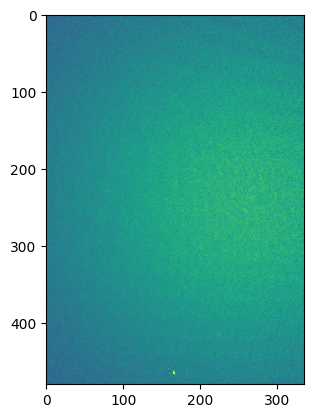

In [7]:
plt.imshow(m.ROI, vmax = 1)

In [8]:
m.FitROI()

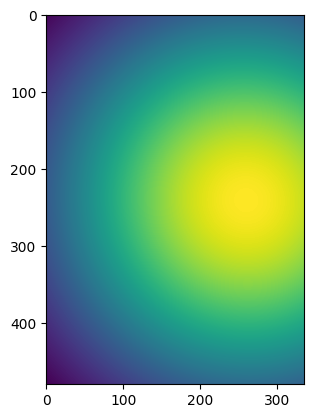

In [9]:
plt.imshow(m.fitted_image)

In [10]:
m.calculateResults()

In [11]:
m.results

{'Fitted Atom Number': 7094268.791126637,
 'Integrated Atom Number': 7094268.803353049,
 'Temperature': 4.359612838457489e-05}

In [13]:
(m.pcov[3]*m.effectivePS)**2/m.variables["ToFTime"]**2

array([7.50342081e-12, 1.49198281e-08, 1.80884588e-10, 9.58636777e-07,
       1.06961350e-06, 2.38333865e-10, 9.12654086e-12])

In [15]:
m.popt[3]

195.64663523788997

In [38]:
m

In [39]:
%pip install h5py

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
    --------------------------------------- 0.0/3.0 MB 487.6 kB/s eta 0:00:07
   ----- ---------------------------------- 0.4/3.0 MB 3.3 MB/s eta 0:00:01
   --------------- ------------------------ 1.2/3.0 MB 6.8 MB/s eta 0:00:01
   ---------------------------- ----------- 2.2/3.0 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------  3.0/3.0 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\iperez\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
def props(cls):   
  return [i for i in cls.__dict__.keys() if i[:1] != '_']

properties = props(m)

In [41]:
properties

['variables',
 'pixelSize',
 'camera',
 'effectivePS',
 'magnification',
 'meas',
 'ROI_size',
 'OpDen',
 'center',
 'ROI',
 'popt',
 'pcov',
 'fitted_image',
 'fitStatus',
 'results']

In [ ]:
#variables, #Opden, #center, #ROI, #popt, #pcov, #fitted_image, #fitStatus, results

In [ ]:
def saveData(data):
    

In [51]:
import h5py
intermediate_results = {}
intermediate_results["OpDen"] = m.OpDen
intermediate_results["Center"] = m.center
intermediate_results["popt"] = m.popt
intermediate_results["pcov"] = m.pcov


hdf5_file_path = "processed_images.h5"
with h5py.File(hdf5_file_path, "a") as hdf5_file:
    group = hdf5_file.create_group(f"iteration_{1}")
    group.create_dataset("Fitted Image", data=m.fitted_image)
    group.create_dataset("fitStatus", m.fitStatus)
    #group.create_dataset("Variables", m.variables)
    group.create_dataset("ROI", m.ROI)
    group.create_dataset("results", m.results)
    group.create_dataset("intermediate_results", intermediate_results)
    #param_group = group.create_group("parameters")


TypeError: Can't convert element 0 ([ 0.11386695  0.11028113  0.00481929  0.11316409  0.00419288  0.05924283
  0.09890407  0.09278173  0.09119024  0.10689779  0.0628009   0.05170137
  0.03813287  0.13580154  0.09143421  0.11081437  0.15790303  0.10064353
 -0.01926842  0.06524052  0.12516314  0.10164994  0.11878354  0.10536052
  0.13026519  0.15276275  0.0822381   0.10277987  0.12953405  0.13353139
  0.15172644  0.09075436  0.11066557  0.07919704  0.07696104  0.05651221
  0.10097592  0.16753776  0.12169693  0.01136376  0.07781702  0.18522432
  0.02597549  0.04467244  0.06421959  0.09006082  0.06720875  0.06518598
  0.11900329  0.13926207  0.05588046  0.04534782  0.10591902  0.15257959
  0.1377837   0.1360408   0.13102826  0.17538912  0.12723017  0.14410034
  0.13030454  0.06421959  0.12739849  0.11370259  0.26372883  0.15415068
  0.15345357  0.06453852  0.11042382  0.17327172  0.14502577  0.12883287
  0.15906469  0.09982034  0.17622663  0.04401689  0.16395468  0.13976194
  0.07696104  0.14272198  0.2006707   0.14683536  0.10118514  0.03922071
  0.12748243  0.17045198  0.21153801  0.12565527  0.15091338  0.10326627
  0.12733942  0.10613242  0.17388816  0.16855536  0.13353139  0.12609273
  0.17832954  0.15746743  0.11601781  0.16705408  0.08112554  0.15314414
  0.14830271  0.13213637  0.11223339  0.19593696  0.09858083  0.12382535
  0.16920047  0.16332506  0.19223601  0.08381867  0.14842001  0.17798316
  0.12808179  0.23483959  0.16833531  0.22314355  0.19251155  0.13904105
  0.20875481  0.24027983  0.18232156  0.13692238  0.21217452  0.26966357
  0.17241603  0.12582017  0.14237198  0.28152821  0.20955471  0.17086906
  0.05342517  0.0762833   0.18879407  0.21256144  0.1135547   0.14396069
  0.22450317  0.22839291  0.2013245   0.18687737  0.17410796  0.1964753
  0.18735935  0.04204824  0.25131443  0.15219182  0.2595112   0.1858365
  0.24574338  0.21511138  0.31143616  0.26898994  0.12451295  0.17848278
  0.2699825   0.15972172  0.17327172  0.14066733  0.27304052  0.17972752
  0.2139645   0.14681487  0.21209372  0.26731477  0.21459649  0.23052366
  0.1496764   0.15343255  0.16793282  0.172141    0.22943948  0.12014431
  0.33199796  0.28214189  0.18669793  0.13052206  0.13410993  0.26640467
  0.30644435  0.25782911  0.1993329   0.21578671  0.19290367  0.21209372
  0.22652765  0.26759531  0.2006707   0.13005313  0.27163036  0.26372883
  0.12216763  0.24946086  0.2006707   0.21999725  0.14732471  0.20163735
  0.26826399  0.21760337  0.24283151  0.2287146   0.18746296  0.16783472
  0.14274805  0.16920047  0.24070988  0.2908022   0.20186615  0.19268434
  0.1204894   0.26391185  0.26334997  0.19451683  0.18012617  0.12705888
  0.20679441  0.13883644  0.23180161  0.17733402  0.22314355  0.1900436
  0.31077779  0.28544743  0.29423947  0.21256144  0.15168459  0.26768141
  0.23440071  0.18526707  0.13786979  0.25869454  0.10889409  0.18962086
  0.20409536  0.22508342  0.1528392   0.19189101  0.27983889  0.13883644
  0.28768207  0.14874526  0.24116206  0.28525194  0.35176093  0.18081893
  0.2964927   0.13119221  0.15529288  0.24469189  0.3030501   0.23638878
  0.35306483  0.20236849  0.20585205  0.19237189  0.22757815  0.27663224
  0.23457225  0.24557059  0.29031019  0.14571181  0.28768207  0.1196645
  0.13353139  0.2534489   0.18781608  0.25222476  0.26510775  0.13026519
  0.29008303  0.189242    0.26596355  0.16142344  0.15510899  0.20278263
  0.27655849  0.21045072  0.23922969  0.29980343  0.23026102  0.17788696
  0.06169357  0.28007747  0.12893368  0.22501097  0.22116139  0.14310084
  0.25741201  0.26088388  0.2378497   0.16205586  0.24595823  0.2006707
  0.30652516  0.22957444  0.23875145  0.15556411  0.29657102  0.24201204
  0.10848064  0.10064353  0.22543976  0.12699969  0.21233264  0.2724146
  0.30486041  0.25014415  0.10724553  0.22738984  0.27029033  0.16623542
  0.31411533  0.42121347  0.25733492  0.27958486  0.33314445  0.41337029
  0.25014415  0.18890053  0.2006707   0.2006707   0.1480531   0.30538165
  0.20633643  0.3247762   0.21130909  0.30132485  0.211844    0.2252466
  0.16106156  0.25489225  0.24756208  0.24994174  0.28410425]) to hsize_t

In [ ]:
hdf5_file_path = "processed_images.h5"
with h5py.File(hdf5_file_path, "a") as hdf5_file:
    group = hdf5_file.create_group(f"iteration_{1}")
    group.create_dataset("image", data=m.OpDen)
    param_group = group.create_group("parameters")
